# Introduction 

The assignment is to provide insights on the Integrated Single Electricity Market (I-SEM) based on Day-Ahead Market (DAM). The relevant variables are provided in an Excel Spreadsheet, which consists of commodity prices, Wind Index, and few other key variables. 

Hence, this project aims to find the key relationship driving the price of DAM and develop a trading strategy based on the information gathered. 

# Preparation of Dataset

Based on the provided file, multiple data frames were extracted as an independent CSV file. This will help to engage some issues such as different timeframe periods and formats.

Thus, in this chapter, it will focus on the Data Wrangling & Features Constructing

## DAM Price

The DAM Price is the targeted variable for this project. The hourly data is provided from Oct-2018 to July 2021. The data wrangling steps are as follows : 

1. Changing format of DateTime
2. Dropping the Month and Year column
3. Re-feature data as time series data by setting the index to DateTime
4. Resample data to Daily data via group by method and day averaging.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# rawdata1 consist of DAM Price in hourly
damdata = pd.read_csv("rawdata1.csv")

In [4]:
# Changing datetime format to datetime
damdata['Datetime'] = pd.to_datetime(damdata['Datetime'] ,format="%d/%m/%Y %H:%M" )

In [5]:
#dropping the other irrelevant column
damdata = damdata.drop(['Month' , 'Year'], axis=1)

In [6]:
# setting datetime as index, timeseries data
damdata.set_index('Datetime', inplace=True)

In [7]:
# groupby day and resample using Mean of value
damdata = damdata.resample('D').mean()

The sample of the data is shown below

In [8]:
# sample of DAM Data
damdata.head(3)

,DAM Price (€/MWh)
Datetime,
2018-10-01,81.856250
2018-10-02,70.063333
2018-10-03,78.890417


## Commodity Price Dataset

The Commodity Price consist of Gas Price, Carbon Price, Coal Price, Oil Price, Distillate Price and Exchange Rate. The daily data is provided from Oct-2018 to July 2021. The data wrangling steps are as follows : 

1. Changing format of Date
2. Rename the column to DateTime
3. Re-feature data as time series data by setting the index to DateTime
4. Resample data to Daily

In [9]:
comdata = pd.read_csv("rawdata2.csv" )

In [10]:
comdata['Date'] = pd.to_datetime(comdata['Date'] , format="%d/%m/%Y")

In [11]:
comdata = comdata.rename(columns={'Date': 'Datetime'})

In [12]:
comdata.set_index('Datetime', inplace=True)

In [13]:
comdata = comdata.asfreq("D")

The sample of the data is shown below (4 columns showed, total 5)

In [14]:
comdata.iloc[:3,:4]

,Gas Price,Carbon Price,Coal Price,Oil Price
Datetime,,,,
2018-10-01,71.85,21.37,101.80,475.888
2018-10-02,71.90,20.98,101.20,474.880
2018-10-03,70.55,21.18,101.65,483.224


## Generator Price Dataset

The Generator Price Dataset consist of 18 generators price. The daily data is provided from Oct-2018 to July 2021. The data wrangling steps are as follows : 

1. Dropping null values
2. Changing data type to float
3. Changing Date format of DateTime
4. Pivot Values base on Generator Code
5. Re-feature data as time series data by setting the index to DateTime
6. Resample data to Daily
7. Re allign DateTime to same date range

In [15]:
costdata = pd.read_csv("rawdata3.csv")

In [16]:
# Return data for non null values
costdata = costdata[costdata['Average Cost'] != "#DIV/0!"]

In [17]:
costdata['Average Cost'] = costdata['Average Cost'].astype("float64")

In [18]:
costdata['Date'] = pd.to_datetime(costdata['Date'] , format="%d/%m/%Y")

In [19]:
costdata = costdata.pivot(index="Date", columns="Code", values="Average Cost")

In [20]:
costdata = costdata.resample('D').mean()

In [21]:
costdata = costdata.loc['2018-10-01' : '2021-6-30']

The sample of the data is shown below (total columns : 18, shown 5)

In [22]:
costdata.iloc[:3,:5]

Code,GU_400270,GU_400271,GU_400272,GU_400324,GU_400325
Date,,,,,
2018-10-01,53.25,53.25,53.25,58.58,58.58
2018-10-02,53.54,53.54,53.54,58.14,58.14
2018-10-03,54.19,54.19,54.19,58.92,58.92


## Generator Availability Dataset

The Generator Price Dataset consist of 18 generators availability. The daily data is provided from Oct-2018 to July 2021. The data wrangling steps are as follows : 

1. Re-feature the Data column and changing to DateTime Format.
2. Dropping time column
3. Setting the index to DateTime
6. Resample data to Daily via Sum

In [23]:
availdata = pd.read_csv("rawdata4.csv")

In [24]:
availdata.loc[:,'Date'] = availdata.Date.astype(str)+' '+availdata.time.astype(str)

In [25]:
availdata['Date'] = pd.to_datetime(availdata['Date'] , format="%d/%m/%Y %H:%M:%S")

In [26]:
availdata = availdata.drop(['time'], axis=1)

In [27]:
availdata = availdata.rename(columns={'Date': 'Datetime'})

In [28]:
availdata.set_index('Datetime', inplace=True)

In [29]:
availdata = availdata.resample('D').sum()

The sample of the data is shown below (total columns : 18, shown 5)

In [30]:
availdata.iloc[:3,:5]

,GU_400270,GU_400271,GU_400272,GU_400324,GU_400325
Datetime,,,,,
2018-10-01,0.0,0.0,0.0,11856.0,11760.0
2018-10-02,0.0,0.0,0.0,11856.0,11760.0
2018-10-03,0.0,0.0,0.0,11856.0,11760.0


## Wind Output and Demand Output Dataset

The Commodity Price consist of the Wind Forecast, Demand Forecast, Wind Output and Net Demand Output. The daily data is provided from Oct-2018 to July 2021. The data wrangling steps are as follows : 

1. Changing format of Date
2. Re-feature data as time series data by setting the index to DateTime
3. Resample data to Daily

In [31]:
windata = pd.read_csv("rawdata5.csv")

In [32]:
windata['Datetime'] = pd.to_datetime(windata['Datetime'] , format="%d/%m/%Y %H:%M")

In [33]:
windata.set_index('Datetime', inplace=True)

In [34]:
windata = windata.resample('D').mean()

The sample of the data is shown below (total columns : 9, shown 5)

In [35]:
windata.iloc[:3,:5]

,DAWF,CWF,AWO,DADF,CDF
Datetime,,,,,
2018-10-01,1010.041667,1254.416667,1276.770833,4133.000000,4136.750000
2018-10-02,1634.208333,1628.833333,1674.083333,4255.208333,4271.166667
2018-10-03,1161.083333,1103.000000,1056.937500,4308.750000,4285.416667


## Feature Constructing

Generator price and availability tend to have 18 variables each. If all the datasets are to be merged, the total number of independent variables will be more than 40. 
Hence, to resolve this issue, the price and availability data for the generator are merged, creating one dataset. Applying Principal Component Analysis will reduce the dimension of the dataset accordingly depending on the variance value tagged with the number of indexes.  


In [36]:
# new features for generator availability and cost of generator
gendata = availdata * costdata

In [37]:
#Replacing NA with 0 value
gendata = gendata.fillna(0)

Result for PCA when n component = 5

In [38]:
#we will reduce the dimension of gendata by using PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(gendata)
print("variance for 5 indexes is equal to :", round(pca.explained_variance_ratio_.sum()*100,2), "%")

variance for 5 indexes is equal to : 83.67 %


Creating new dataframe for the PCA Indexes which represents the Generator Availability and Price
Repeat the data wrangling process :

1. Reseting index and restructure as Time Series Data
2. Normalise the data using Standard Scaler function

the glimpse of the new feature dataset is as follows (3 columns showed, total 5):

In [39]:
principalComponents = pca.fit_transform(gendata)
pcadf = pd.DataFrame(data = principalComponents, columns = ['Generator Index 1', 'Generator Index 2', 'Generator Index 3', 'Generator Index 4', 'Generator Index 5'])

In [40]:
availdata1 = availdata
availdata1 = availdata1.reset_index()
availdata1 = availdata1.join(pcadf)
availdata1.set_index('Datetime', inplace=True)
availdata1 = availdata1.iloc[:,-5:]

In [41]:
#Scale and normalise data
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
df_scaled = standard_scaler.fit_transform(availdata1)
df_gen = pd.DataFrame(df_scaled, index=availdata1.index, columns=availdata1.columns)

In [42]:
df_gen.iloc[:3,:3]

,Generator Index 1,Generator Index 2,Generator Index 3
Datetime,,,
2018-10-01,0.689661,-1.466066,-2.993087
2018-10-02,0.496077,-1.291089,-2.772752
2018-10-03,0.776933,-1.532559,-3.104813


##  Merging all datasets as one Main Dataframe 

On the last step of this chapter, all the datasets that has been featured will be merged as one main Dataframe. 
The dataset will be scaled and standardize accordingly. The Sample Dataset can be viewed by running code in line 126.


In [46]:
df = damdata.join(comdata).join(windata[['CWF','AWO','CDF','ANDO']])

In [47]:
df

,DAM Price (€/MWh),Gas Price,Carbon Price,Coal Price,Oil Price,Distillate Price,Exchange Rate (£:€),CWF,AWO,CDF,ANDO
Datetime,,,,,,,,,,,
2018-10-01,81.856250,71.850,21.37,101.80,475.888,734.50,1.1226,1254.416667,1276.770833,4136.750000,2928.979167
2018-10-02,70.063333,71.900,20.98,101.20,474.880,742.00,1.1231,1628.833333,1674.083333,4271.166667,2581.687500
2018-10-03,78.890417,70.550,21.18,101.65,483.224,742.25,1.1249,1103.000000,1056.937500,4285.416667,3255.812500
2018-10-04,76.738333,70.475,21.34,100.80,473.648,744.75,1.1289,1037.958333,1034.083333,4276.500000,3276.979167
2018-10-05,78.312917,71.100,22.16,101.35,471.296,741.75,1.1342,414.625000,426.833333,4245.166667,3826.312500
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,100.131667,82.400,54.95,108.50,422.130,573.25,1.1635,1188.020833,1108.250000,3833.250000,2727.729167
2021-06-27,99.453333,82.400,54.95,108.50,422.130,573.25,1.1635,887.854167,894.729167,3673.520833,2797.250000
2021-06-28,108.820833,82.330,55.40,113.15,415.180,567.75,1.1667,569.312500,618.500000,4152.687500,3504.937500


In [48]:
from sklearn import preprocessing

min_max_scaler = preprocessing.StandardScaler()
df_scaled = min_max_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

In [49]:
df_scaled = df_scaled.join(df_gen)

In [50]:
df_scaled

,DAM Price (€/MWh),Gas Price,Carbon Price,Coal Price,Oil Price,Distillate Price,Exchange Rate (£:€),CWF,AWO,CDF,ANDO,Generator Index 1,Generator Index 2,Generator Index 3,Generator Index 4,Generator Index 5
Datetime,,,,,,,,,,,,,,,,
2018-10-01,1.214334,1.967404,-0.721478,2.343492,2.144558,1.709502,-0.482376,-0.228477,-0.221092,-0.311326,0.165431,0.689661,-1.466066,-2.993087,-1.452823,-1.113482
2018-10-02,0.713466,1.970294,-0.766638,2.307005,2.130754,1.762211,-0.464309,0.180081,0.216124,0.017466,-0.229276,0.496077,-1.291089,-2.772752,-1.464685,-1.201613
2018-10-03,1.088370,1.892265,-0.743479,2.334370,2.245024,1.763968,-0.399264,-0.393700,-0.463005,0.052323,0.536886,0.776933,-1.532559,-3.104813,-1.468798,-1.040627
2018-10-04,0.996966,1.887930,-0.724952,2.282681,2.113881,1.781538,-0.254721,-0.464673,-0.488154,0.030512,0.560943,0.447381,-1.844427,-2.425790,-0.347153,-2.136754
2018-10-05,1.063842,1.924055,-0.629998,2.316127,2.081671,1.760454,-0.063202,-1.144845,-1.156392,-0.046131,1.185276,0.046488,-1.468505,-1.983655,-0.386308,-2.451575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,1.990527,2.577185,3.166974,2.750926,1.408348,0.576249,0.995576,-0.300927,-0.406538,-1.053709,-0.063295,-0.037895,0.731943,-0.215402,3.737224,-0.642381
2021-06-27,1.961717,2.577185,3.166974,2.750926,1.408348,0.576249,0.995576,-0.628464,-0.641504,-1.444418,0.015717,0.288683,0.643517,-0.005075,3.783685,-0.441303
2021-06-28,2.359573,2.573139,3.219082,3.033697,1.313169,0.537596,1.111211,-0.976052,-0.945476,-0.272342,0.820024,0.287577,0.641383,-0.000784,3.785072,-0.415078


In [126]:
# df_scaled.head()

# Variability Importance Analysis

This chapter is to study the importance of the independent variables towards affecting the DAM Price. Recently with the price of DAM Price is surging to a yearly high. It is an excellent opportunity to study the market landscape and differentiate the changes that are currently happening on other commodity indexes. 

## Correlation Analysis

Firstly, a correlation matrix is plotted to study the relationship between the targeted variable against other variables

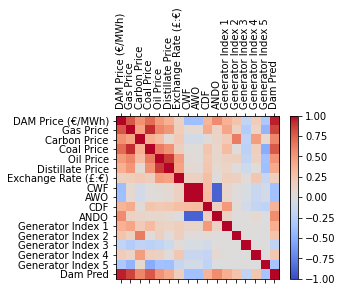

In [124]:
corr = df_scaled.corr()
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_scaled.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_scaled.columns)
ax.set_yticklabels(df_scaled.columns)
plt.show()

From the correlation matrix, a strong correlation can be observed between DAM Price against GAS Price, Continuous Wind Forecast(CWF), Actual Wind Output (AWO) and  Actual Net Demand Output (ANDO). However, most of the wind index has strong correlation between each other (see CWF and AWO).

Based from the result, a further study/method are to be conducted using the following method:

1. Regression Method
2. Multilayer Perceptron Regressor (MLPR)
3. Random Forest

## Train and Test Dataset

The data will be split between the Train/Test with the following manner:

Train : 2018 - 2020

Test : 2021

In [51]:
X = df_scaled.iloc[:,1:17]
y = df_scaled.iloc[:,0]

In [52]:
X_train = X.loc['2018-10-01' : '2020-12-31']
y_train = y.loc['2018-10-01' : '2020-12-31']

In [53]:
X_test = X.loc['2021-01-01' : '2021-06-30']
y_test = y.loc['2021-01-01' : '2021-06-30']

## Regression Analysis

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt
from sklearn.svm import SVR

In [55]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

# print("Predictions: ", predictions_lr)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions_lr))
print('Coefficient of determination: %.4f'
      % r2_score(y_test, predictions_lr))

# coefs = pd.DataFrame(
#     {
#         "Features" : X_train.columns.to_list(),
#         "Co-efficient" : model_lr.coef_
#     }
# )

# coefs.sort_values(by = "Co-efficient", ascending = False)



Mean squared error: 0.36
Coefficient of determination: 0.6814


<AxesSubplot:>

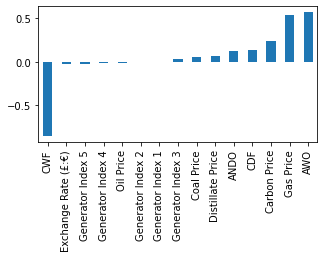

In [56]:
fig, ax = plt.subplots(figsize = (5,3))
pd.Series(model_lr.coef_,index=X.columns).sort_values().plot(kind='bar', figsize = (5,2.5))

Based from the result of regression analysis

R^2 = 68% <br>

Based from the R-Squared score, the model tend to explained 68% of variance for 2021 test data. 

**Variable Importance Analysis Result**<br>

The plot showed that CWF, AWO and Gas price tend has the highest coefficient values. CWF is negatively correlated to DAM Price and GAS Price and AWO is positively correlated to DAM Price for this Regression model.  However, since AWO and CWF are strongly correlated, further analysis on the relationship on DAM Price against Continuos Wind Forecast and Gas Price only. 


## Multi Layer Perceptron Regressor

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(random_state=1, max_iter=400000, activation='relu', solver = 'sgd', hidden_layer_sizes = 150, learning_rate = 'adaptive' , learning_rate_init = 0.013)
model_mlp = reg.fit(X_train, y_train)
prediction_mlp = model_mlp.predict(X_test)

print('Coefficient of determination: %.2f'
      % model_mlp.score(X_test,y_test))

# print('Coefficient of determination: %.4f'
#       % r2_score(y_test, prediction_reg))

# cross_val_score(dtr, X_test, y_test, cv=10)

Coefficient of determination: 0.71


Next, the data is pass into Multi Layer Perceptron Regressor. This model manage to improve the R^2 score by 3% to 71%.
However, machine learning method doesnt provide much information on the variable importance. (Black Box Problem). The model will be used to predict DAM Price during the implementation of trading strategy later in this project. 

## Random Forest Regressor

Mean squared error: 0.78
Coefficient of determination: 0.31


<AxesSubplot:>

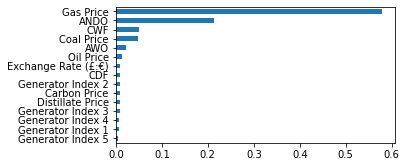

In [58]:
rf = RandomForestRegressor(n_jobs=-1)
model_rf = rf.fit(X_train, y_train)
prediction_rf = model_rf.predict(X_test)

# print("Predictions: ", prediction_rf)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, prediction_rf))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction_rf))

coefs1 = pd.DataFrame(
    {
        "Features" : X_train.columns.to_list(),
        "Importance" : rf.feature_importances_
    }
)

coefs1.sort_values(by = "Importance", ascending = False)

pd.Series(rf.feature_importances_,index=X.columns).sort_values().plot(kind='barh',figsize = (5,2.5))

**Results**

R^2 = 34%, Model tend to not learn very well based on the train dataset.
However, based on the Features Importance Output, 
It validates similar results as per Regression Analysis of which Gas Price and Wind Index to play an important role in affecting the DAM Price. 

## Result Visualisation

For this part, All the result from the analysis will be visualised. The focus will be on GAS Price and CWF against DAM Price. 

In [59]:
dfplot1 = df['DAM Price (€/MWh)'].resample('M').mean()

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
dfplot1 = pd.DataFrame(dfplot1)

In [62]:
dfplot2 = df['CWF'].resample('M').mean()

In [63]:
dfplot2 = pd.DataFrame(dfplot2)

In [64]:
dfplot3 = df['AWO'].resample('M').mean()

In [65]:
dfplot4 = df['Gas Price'].resample('M').mean()

In [66]:
plotdata = dfplot1.join(dfplot2).join(dfplot3).join(dfplot4)

In [67]:
# fig, ax = plt.subplots(figsize = (10,8))    
# fig = sns.barplot(x = plotdata.index.date, y =plotdata["DAM Price (€/MWh)"] , data = plotdata, ci = None, ax=ax, label="Average Monthly DAM")

# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
# ax.legend(loc=1)
# ax.set_title('Monthly DAM Price')

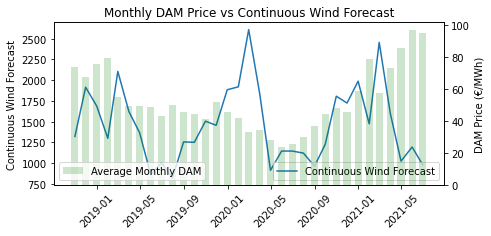

In [68]:
fig, ax1 = plt.subplots(figsize = (7,3))
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(plotdata.CWF, label="Continuous Wind Forecast") #plot the Revenue on axis #1

# the next few lines plot the fiscal year data as bar plots and changes the color for each.
ax2.bar(plotdata.index, plotdata['DAM Price (€/MWh)'],width=20, alpha=0.2, color='green', label="Average Monthly DAM")


ax2.grid(b=False) # turn off grid #2

ax1.set_title('Monthly DAM Price vs Continuous Wind Forecast')
ax1.set_ylabel('Continuous Wind Forecast')
ax2.set_ylabel('DAM Price (€/MWh)')
ax2.legend(loc=3)
ax1.legend(loc=4)


for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

From the plot above, the graph proved that the movement of monthly average price of DAM is against the direction of Continuous Wind Forecast. The trend surfaced more clearly during end of 2019 to early 2020 and second quarter of 2021. 

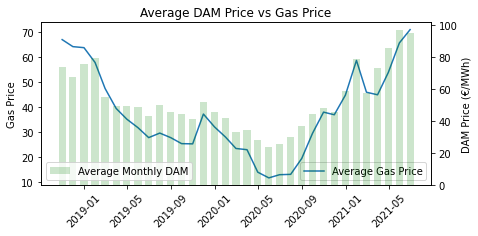

In [69]:
fig, ax1 = plt.subplots(figsize = (7,3))
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(plotdata['Gas Price'], label="Average Gas Price") #plot the Revenue on axis #1

# the next few lines plot the fiscal year data as bar plots and changes the color for each.
ax2.bar(plotdata.index, plotdata['DAM Price (€/MWh)'],width=20, alpha=0.2, color='green', label="Average Monthly DAM")


ax2.grid(b=False) # turn off grid #2

ax1.set_title('Average DAM Price vs Gas Price')
ax1.set_ylabel('Gas Price')
ax2.set_ylabel('DAM Price (€/MWh)')
ax2.legend(loc=3)
ax1.legend(loc=4)


for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

The plot showcased a strong positive correlation between the average monthly price of DAM and Average Monthly Price of Gas. 

Based from these 2 plots, it can be conclude that the movement of DAM Price is highly affected by these 2 variables. Hence, The surge on DAM Price in 2021 may due to the combination of Increased Gas Price and Low Wind Output

# Development of Trading Strategy and Algorithm

In this section, it will mainly focus on the development of trading algorithm based on the information gathered from the previous analysis. The trading strategies will be used on the trading data, which is on half-hour row inputs. The trading data consist of DAM Price, IDA1, IDA2, IDA3, and BM Price. 

A similar data-wrangling method will be applied to the trading data. However, the gas price, which is in daily frequency, requires some adjustment to fit the half-hour rows. Thus, the forward fill method will be applied after spreading the DateTime index. The dataset can be observed by running code line 130. 

In [70]:
tradedata = pd.read_csv("rawdata7.csv")

In [71]:
# tradedata['Cont WF'] = tradedata['Cont WF'].astype(int)
tradedata['Datetime'] = pd.to_datetime(tradedata['Datetime'] ,format="%d/%m/%Y %H:%M" )
tradedata = tradedata.drop('Trade Date', axis=1)
tradedata.set_index('Datetime', inplace=True)
tradedata = tradedata[2:]
tradedata = tradedata.loc[: '2021-06-30 00:00:00']

In [72]:
comdata1 = comdata.resample('30min').sum()
comdata1 = comdata1.replace(to_replace=0, method='ffill')
comdata1 = comdata1[comdata1.index.year >= 2019]

In [73]:
tradedata = tradedata.join(comdata1['Gas Price'])

In [74]:
tradedata.dropna(subset=['Cont WF'],inplace=True)

In [75]:
tradedata.head()

,Start Time,DAM Price (€/MWh),IDA1 Price (€/MWh),IDA2 Price (€/MWh),IDA3 Price (€/MWh),BM Price (€/MWh),Volume (NIV),DA WF,Cont WF,Act Wind,DADF,CDF,Act Demand,Day Ahead Net Demand Forecast,Continuous Net Demand Forecast,Actual Net Demand Output,Gas Price
Datetime,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0:00:00,70.28,75.000,NaN,NaN,35.30,-19.23,902.0,838.0,925.0,3812.0,3812.0,3683.0,2910,2974,2758,56.0
2019-01-01 00:30:00,0:30:00,70.28,74.000,NaN,NaN,34.61,-23.61,902.0,827.0,905.0,3812.0,3812.0,3586.0,2910,2985,2681,56.0
2019-01-01 01:00:00,1:00:00,65.18,65.274,NaN,NaN,30.11,-25.90,765.0,710.0,906.0,3619.0,3615.0,3501.0,2854,2905,2595,56.0
2019-01-01 01:30:00,1:30:00,65.18,60.596,NaN,NaN,25.11,-32.79,765.0,723.0,878.0,3619.0,3615.0,3368.0,2854,2892,2490,56.0
2019-01-01 02:00:00,2:00:00,60.91,50.261,NaN,NaN,25.64,-29.34,609.0,576.0,703.0,3372.0,3371.0,3222.0,2763,2795,2519,56.0


## Trade Strategy 1

For the first strategy, the data showed that DAM Price is higher than BM for avery half hour timeline by 58.42%.

Hence, a simple trading rule is applied on the trading data which is to sell all DAM Price for every half hour from 2019 to 2021

In [270]:
#Rule base 1
rule1 = (tradedata['DAM Price (€/MWh)'] > tradedata['BM Price (€/MWh)']).sum()/tradedata.shape[0]
#print('DAM Price is higher than BM Price by:', (rule1*100).round(2),'%')

In [271]:
def traderule1(damprice, bmprice):
    x = damprice
    y = bmprice

    return (x - y)

In [272]:
profit_rule1 = tradedata.apply(lambda x:traderule1(x['DAM Price (€/MWh)'],x['BM Price (€/MWh)']),axis=1)

In [273]:
tradedata['Strat1_profit'] = profit_rule1

In [274]:
profit_rule1.sum()

34258.414000000004

<AxesSubplot:xlabel='Datetime'>

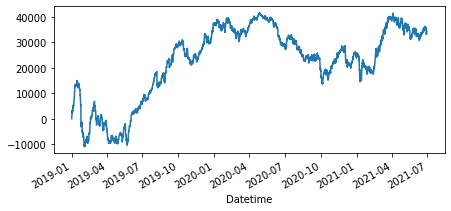

In [275]:
profit_rule1.cumsum().plot(figsize = (7,3))

Based on the result from the chart which plots the value of cumulative profit. The profit gain for 3 years is at EUR34,258. The trading frequency is 100% for all the 3 years. Some losses are recorded during 2020, but it stabilised back in 2021. 

## Trade Strategy 2

Trading strategy 2 will trade base on the value of CWF and Gas Price. 
The strategy is to sell the t+1 DAM Price and buy back BM Price if the value of t index satisfy the following rule

1. value of Cont WF is more than 1,000
2. Value of Gas price is less than 35

In [276]:
profit_rule2 = [np.nan]

for i in range(len(tradedata)):
    if (tradedata.iloc[i,8] > 1000) & (tradedata.iloc[i,16] < 35):
        profit_rule2.append(tradedata.iloc[i+1, 1] - tradedata.iloc[i+1, 5])
    else:
        profit_rule2.append(np.nan)

profit_rule2 = profit_rule2[:-1]
    

In [277]:
tradedata['Strat2_profit'] = profit_rule2

In [278]:
tradedata.iloc[5197:5200,[1,5,8,16,18]]

,DAM Price (€/MWh),BM Price (€/MWh),Cont WF,Gas Price,Strat2_profit
Datetime,,,,,
2019-04-19 06:30:00,44.770,34.02,1248.0,33.1,10.750
2019-04-19 07:00:00,48.505,35.07,1128.0,33.1,13.435
2019-04-19 07:30:00,48.505,34.33,1157.0,33.1,14.175


The Above is the example of Strat 2 Profits on 3 half-hour periods. Notice that for the first row, the Cont WF is above 1,000 and Gas price is below 35, thus, the algo will short DAM Price for the next period (Sold at 48.505) and Buy back at 35.07 gaining 13.43 Euros.
Same goes for the next period where 14.17 Euros was gained.

the total profit gain in 3 years for this strategy is EUR50,670 

In [279]:
# np.nansum(profit_rule2)

<AxesSubplot:xlabel='Datetime'>

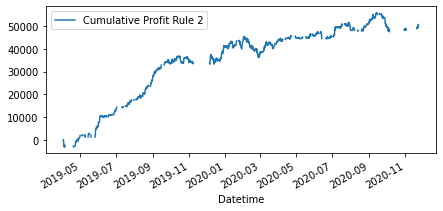

In [280]:
cumsum1 = pd.DataFrame(profit_rule2,columns=['Cumulative Profit Rule 2'],index=tradedata.index)
cumsum1.cumsum().plot(figsize = (7,3))

Based from the plot, Trade strategy 2 performs extremely well in 2019 and moderately in 2020. However in 2021, the strategy didnt trade any period as the Gas Price did not satisfy the threshold 
which was set in the algorithm. The gas price for 2021 has been above 35 until June 2021. Thus, it has 0% period traded in 2021. 

## Trade Strategy 3 (using Prediction values)

Trading strategy 3 will trade base on the value of Cont WF, Gas Price and using the value of Pred DAM which is value simulate using MLP Regressor.
Sample of Pred DAM is seen below



In [281]:
prediction_mlp1 = model_mlp.predict(X)
df_scaled['Dam Pred'] = prediction_mlp1

In [282]:
pred_df = df_scaled.loc[:,['DAM Price (€/MWh)',"Dam Pred"]]

In [283]:
pred_df.head(2)

,DAM Price (€/MWh),Dam Pred
Datetime,,
2018-10-01,1.214334,0.993599
2018-10-02,0.713466,0.845864


In [284]:
# pred_df.plot(figsize = (7,2.5))

The strategy is to sell the IDA1 Price and buy back BM Price at index t, if the value of t index satisfy the following rule

1. Value of Continuous Wind Forecast more than 700
2. Value of Gas price is less than 55
3. DAM Price > DAM Pred for that day

In the contrary, situation 1,2,3 is reversed then <br>

1. Value of Continuous Wind Forecast less than 700
2. Value of Gas price is more than 55
3. DAM Price < DAM Pred for that day

Buy the IDA1 Price and sell back BM Price at index t <br>
<br>

In [285]:
def traderule3(datetime, cwf , gasprice, ida1, bmprice, ):
    
    x = ida1
    y = bmprice
    z = pred_df.loc[str(datetime).split(' ')[0]]
    dam_price = z[0]
    dam_pred = z[1]
    if (cwf > 700) & (gasprice < 55) & (dam_pred < dam_price) :
         return (x - y)
    elif (cwf < 700) & (gasprice > 55) & (dam_pred > dam_price) :
         return (y - x)
    else:
        return(np.nan)
        

In [286]:
profit_rule3 = tradedata.apply(lambda x:traderule3(x.name,x['Cont WF'],x['Gas Price'],x['IDA1 Price (€/MWh)'],x['BM Price (€/MWh)']),axis=1)

In [287]:
tradedata['Strat3_profit'] = profit_rule3

In [288]:
pred_df.loc['2019-04-19':'2019-04-20']

,DAM Price (€/MWh),Dam Pred
Datetime,,
2019-04-19,-0.048021,-0.203402
2019-04-20,0.077625,-0.020375


To simulate an example lets take value from above table. On 19th April 2019, DAM Price > DAM Pred.

In [289]:
tradedata.iloc[5197:5200,[1,2,5,8,16,19]]

,DAM Price (€/MWh),IDA1 Price (€/MWh),BM Price (€/MWh),Cont WF,Gas Price,Strat3_profit
Datetime,,,,,,
2019-04-19 06:30:00,44.770,41.484,34.02,1248.0,33.1,7.464
2019-04-19 07:00:00,48.505,40.237,35.07,1128.0,33.1,5.167
2019-04-19 07:30:00,48.505,47.460,34.33,1157.0,33.1,13.130


Next, observing values from the above rows: <br>

Cont WF > 700 and GAS Price < 55. Thus the decision is to sell IDA1 Price and Buy BM Price.
as all these 3 conditions are satisfied for all the 3 rows at hour 6:30, 7:00 and 7:30. the profits recorded are EUR7.464, EUR5.167 and EUR 13.13 respectively. 

In [290]:
# profit_rule3.sum()

<AxesSubplot:xlabel='Datetime'>

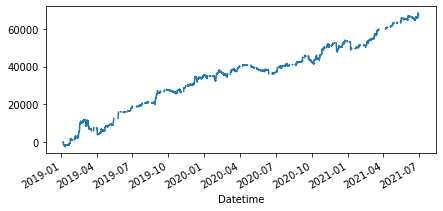

In [291]:
profit_rule3.cumsum().plot(figsize = (7,3))

The plot showcased the cumulative profit gained from Trading Strategy 3 which sum up to a total of EUR 67,539 in the span of 3 years. The strategy has a trading period of 30% which has win ratio of above 55%. 

Thus, based on all the 3 trading strategy, this strategy tend to provide the best result with reliable consistency on the trades. 

In [292]:
# This part is to form a table for plots, creating results table and simulating no of trades and win ratio

In [293]:
# Result Data = return profit values for all strategies
# Trade Data = use for simulating No. of Trades and Win Ratio
# Plot Data = use for plotting cumulative profits by trading strategies across the years

In [294]:
resultdata = tradedata.iloc[: , -3:]

In [295]:
plotdata = tradedata.iloc[: , -3:]
plotdata = plotdata.replace(np.nan, 0)

In [296]:
plotdata['Cum Profit Strat1'] = plotdata['Strat1_profit'].cumsum()
plotdata['Cum Profit Strat2'] = plotdata['Strat2_profit'].cumsum()
plotdata['Cum Profit Strat3'] = plotdata['Strat3_profit'].cumsum()

In [297]:
resultdata['Cum Profit Srat1'] = resultdata['Strat1_profit'].cumsum()
resultdata['Cum Profit Srat2'] = resultdata['Strat2_profit'].cumsum()
resultdata['Cum Profit Srat3'] = resultdata['Strat3_profit'].cumsum()

In [298]:
resultdata = resultdata.resample('Y').sum()

In [299]:
resultdata = resultdata.iloc[:,:3]

In [300]:
tradedata['year'] = tradedata.index.map(lambda x:x.year)

In [301]:
trade_ratio_df = pd.DataFrame(index=[2019,2020,2021])

for ix in trade_ratio_df.index:
    
    temp = tradedata.loc[tradedata.year == ix]
    trade_ratio_df.loc[ix,'trade_ratio_strat1'] = (len(temp[temp['Strat1_profit'].notnull()])/temp.shape[0])*100
    trade_ratio_df.loc[ix,'trade_ratio_strat2'] = (len(temp[temp['Strat2_profit'].notnull()])/temp.shape[0])*100
    trade_ratio_df.loc[ix,'trade_ratio_strat3'] = (len(temp[temp['Strat3_profit'].notnull()])/temp.shape[0])*100

In [302]:
win_ratio_df = pd.DataFrame(index=[2019,2020,2021])

for ix in win_ratio_df.index:
    
    temp = tradedata.loc[tradedata.year == ix]
    win_ratio_df.loc[ix,'winratio_strat1'] = (temp.Strat1_profit >= 0).sum()/(len(temp[temp['Strat1_profit'].notnull()]))*100
    win_ratio_df.loc[ix,'winratio_strat2'] = (temp.Strat2_profit >= 0).sum()/(len(temp[temp['Strat2_profit'].notnull()]))*100
    win_ratio_df.loc[ix,'winratio_strat3'] = (temp.Strat3_profit >= 0).sum()/(len(temp[temp['Strat3_profit'].notnull()]))*100



In [303]:
# trade_ratio_df

In [304]:
# win_ratio_df.replace(np.nan,0)

# Final Result and Evaluation

In [305]:
resultdata['year'] = resultdata.index.map(lambda x:x.year)

In [306]:
resultdata = resultdata.set_index("year")

In [307]:
Finalresult1 = trade_ratio_df.join(win_ratio_df).join(resultdata).round(2)

In [310]:
plotdata1 = plotdata.iloc[: , -3:]

<AxesSubplot:xlabel='Datetime'>

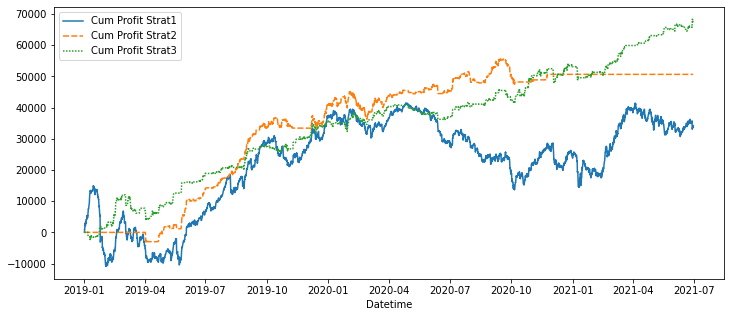

In [320]:
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(data=plotdata1)


In [313]:
# Finalresult1.iloc[: ,[6,0,3,7,1,4,8,2,5]].replace(np.nan , 0)

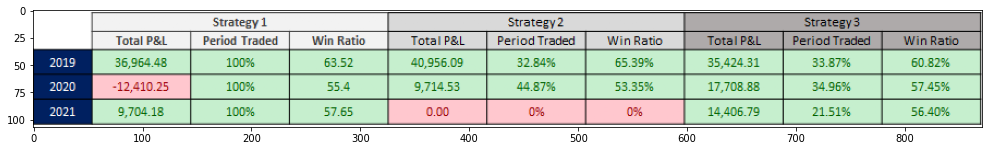

In [319]:
#Run Above code to see table generated via Python
import matplotlib.image as mpimg
img = mpimg.imread('TablePNL.png')
plt.figure(figsize = (17,7))
plt.imshow(img)

Based on the plot, The total profits made from 2019 to 2021 for the 3 strategies are as follows: <br>

**Strategy 1** : EUR 34,258 <br>

**Strategy 2** : EUR 50,670<br>

**Strategy 3** : EUR 67,539<br>

There are also other key findings, such as : <br>

- For 2019, All the strategy tend to provide good results, However, the market landscape change drastically for 2020 as all strategies recorded lost Year on Year. 
- Strategy 1 has traded all the period, however, for 2020, the landscape has reversed which caused the 12k loss.
- Strategy 2 didn’t execute any trade for 2021, this is due to the value of gas price is above the threshold set in the algorithm.
- Strategy 3 only trade on average 30% of total period, however, the win ratio is above 55% which then provide a good consistency for the cumulative profit across 3 years. 
- Based from the plot, Strategy 3 showcased the best result in term of consistency and profit. 
- Hence we can conclude that, the fundamental and technical analysis approach for the algorithm suits the market landscape.

# Conclusion

- In this project, the main focus of the analysis was based on the variable Continuous Wind Forecast and Gas Price
- However, there is still other information that is still reliable to be extracted from the data.
- For Instance, the Generator Price and Availability were not significant in the regression analysis
- On the other hand, if a tree-based decision is to be used, the generator availability index might provide better insights.
- Using that information into the trading algorithm can provide better results as the price of Integrated Single Electricity Market (I-SEM) is highly based on the cost of generator in the case where the wind output is low

However, proper new features need to be developed before passing the data into the model to use this approach.

In terms of the trading algorithm, it is shown that the trading accuracy (win ratio) is improved by increasing the trading rules. In short, these are what are called trading procedures. The increase in the number of the trading rule will reduce the total period traded. But it can improve the win ratio if a proper direction is developed. It is also highly dependance on the fund manager/ Company to decide the trading Risk/Reward ratio in order to determine the best result outcome. 

